In [2]:
%load_ext autoreload
%autoreload 2

import sys
import pathlib

import numpy as np
import pandas as pd
import xarray as xr
from tqdm.dask import TqdmCallback as ProgressBar
import oceansoda_ethzv2 as ocn
from oceansoda_ethzv2.data.utils import config
from loguru import logger

logger.remove()
logger.add(sys.stdout, level='DEBUG')
logger.add('./dataset_download.log', level='DEBUG')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2

# Downloading data

In [65]:
catalog = config.read_dataset_config('dataset_sources.yaml')
datasets = dict(
    # sst_cci = ocn.data.HTTPDailyDataset(**catalog['ceda']['sstcci']),     # sst
    # sss_cci = ocn.data.HTTPDailyDataset(**catalog['ceda']['ssscci']),     # sss
    # chl_cci = ocn.data.OCCCIDataset(**catalog['ftp']['occci']),           # chl
    # soda = ocn.data.SODADataset(**catalog['soda']['soda_3_15_2']),        # mld / sss  --- note, using local files - throws error otherwise
    # ssh_duacs = ocn.data.CMEMSDataset(catalog['cmems']['duacs']),         # ssh
    # cmems_multiobs = ocn.data.CMEMSDataset(catalog['cmems']['multiobs']),   # sss
    # cmems_multiobs = ocn.data.CMEMSDataset(catalog['cmems']['multiobs']),   # sss
    # era5 = ocn.data.era5.ERA5Dataset(catalog['era5']['gcs_zarr']),        # wind /press
    # sst_noaa = ocn.data.HTTPDailyDataset(**catalog['ceda']['sst_noaa'])   # sst filler
)

In [70]:
multiobs = datasets['cmems_multiobs']

In [84]:
multiobs.get_timestep(2024, 0)

<xarray.Dataset> Size: 8MB
Dimensions:                    (time: 1, lat: 720, lon: 1440)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2024-01-04T12:00:00
  * lat                        (lat) float64 6kB -89.88 -89.62 ... 89.62 89.88
  * lon                        (lon) float64 12kB -179.9 -179.6 ... 179.6 179.9
Data variables:
    sss_multiobs               (time, lat, lon) float32 4MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    flag_multiobs              (time) float32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    sss_multiobs_sigma_regrid  (time, lat, lon) float32 4MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    title:                    Global Analysed Sea Surface Salinity and Density
    references:               Buongiorno Nardelli, B., R. Droghei, and R. San...
    institution:              CNR
    Conventions:              CF-1.7
    contact:                  servicedesk.cmems@mercator-ocean.eu
    processing_renamed_vars:  {'latitude': 'lat', 'longitude': 'lon', 'sos': ...
    processing_coarsen_grid:  {'boundary': 'pad', 'time': 8, 'lat': 2, 'lon': 2}

In [85]:
t0 = 2024
t1 = 2025

for year in range(t0, t1):
    for index in range(0, 46):
        for key in datasets:
            dataset = datasets[key]
            try:
                dataset.get_timestep_unprocessed(year=year, index=index).persist()
                dataset.write_timestep_to_disk(year=year, index=index, progress=True)
            except Exception as e:
                logger.error(str(e))
                continue

2025-05-30 13:49:00.286 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-01-04 12:00:00 did not match expected time 2024-01-05 00:00:00. Adjusted to 2024-01-05 00:00:00.
2025-05-30 13:49:00.289 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:49:00.302 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-01-05 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-01-05 00:00: 100%|██████████| 194/194 [00:09<00:00, 19.71it/s] 

2025-05-30 13:49:10.684 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-01-05 00:00
2025-05-30 13:49:10.696 | WARNING  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:311 - Skipping saving: Given timestep [year=2024, index=0] already exists in ../data/8D_025/flag_multiobs-8D_025.zarr/2024
2025-05-30 13:49:10.699 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-01-05 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-01-05 00:00: 100%|██████████| 194/194 [00:20<00:00,  9.69it/s] 

2025-05-30 13:49:31.509 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-01-05 00:00


2025-05-30 13:49:45.261 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-01-12 12:00:00 did not match expected time 2024-01-13 00:00:00. Adjusted to 2024-01-13 00:00:00.
2025-05-30 13:49:45.262 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:49:45.277 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-01-13 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-01-13 00:00: 100%|██████████| 194/194 [00:08<00:00, 24.24it/s] 

2025-05-30 13:49:53.434 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-01-13 00:00
2025-05-30 13:49:53.450 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-01-13 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-01-13 00:00: 100%|██████████| 20/20 [00:00<00:00, 1820.64it/s]

2025-05-30 13:49:53.496 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-01-13 00:00
2025-05-30 13:49:53.513 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-01-13 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-01-13 00:00: 100%|██████████| 194/194 [00:16<00:00, 11.44it/s] 

2025-05-30 13:50:10.679 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-01-13 00:00


2025-05-30 13:50:16.440 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-01-20 12:00:00 did not match expected time 2024-01-21 00:00:00. Adjusted to 2024-01-21 00:00:00.
2025-05-30 13:50:16.442 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:50:16.463 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-01-21 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-01-21 00:00: 100%|██████████| 194/194 [00:09<00:00, 20.48it/s] 

2025-05-30 13:50:26.098 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-01-21 00:00
2025-05-30 13:50:26.115 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-01-21 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-01-21 00:00: 100%|██████████| 20/20 [00:00<00:00, 1767.51it/s]

2025-05-30 13:50:26.160 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-01-21 00:00
2025-05-30 13:50:26.179 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-01-21 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-01-21 00:00: 100%|██████████| 194/194 [00:18<00:00, 10.77it/s]

2025-05-30 13:50:44.406 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-01-21 00:00


2025-05-30 13:50:49.058 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-01-28 12:00:00 did not match expected time 2024-01-29 00:00:00. Adjusted to 2024-01-29 00:00:00.
2025-05-30 13:50:49.060 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:50:49.079 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-01-29 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-01-29 00:00: 100%|██████████| 194/194 [00:06<00:00, 30.96it/s] 

2025-05-30 13:50:55.530 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-01-29 00:00
2025-05-30 13:50:55.547 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-01-29 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-01-29 00:00: 100%|██████████| 20/20 [00:00<00:00, 1578.56it/s]

2025-05-30 13:50:55.594 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-01-29 00:00
2025-05-30 13:50:55.627 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-01-29 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-01-29 00:00: 100%|██████████| 194/194 [00:16<00:00, 12.08it/s]

2025-05-30 13:51:11.902 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-01-29 00:00


2025-05-30 13:51:21.197 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-02-05 12:00:00 did not match expected time 2024-02-06 00:00:00. Adjusted to 2024-02-06 00:00:00.
2025-05-30 13:51:21.200 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:51:21.222 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-02-06 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-02-06 00:00: 100%|██████████| 194/194 [00:05<00:00, 37.77it/s] 

2025-05-30 13:51:26.546 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-02-06 00:00
2025-05-30 13:51:26.562 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-02-06 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-02-06 00:00: 100%|██████████| 20/20 [00:00<00:00, 1797.97it/s]

2025-05-30 13:51:26.627 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-02-06 00:00
2025-05-30 13:51:26.644 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-02-06 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-02-06 00:00: 100%|██████████| 194/194 [00:14<00:00, 13.47it/s] 

2025-05-30 13:51:41.252 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-02-06 00:00


2025-05-30 13:51:48.351 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-02-13 12:00:00 did not match expected time 2024-02-14 00:00:00. Adjusted to 2024-02-14 00:00:00.
2025-05-30 13:51:48.353 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:51:48.371 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-02-14 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-02-14 00:00: 100%|██████████| 194/194 [00:06<00:00, 32.05it/s] 

2025-05-30 13:51:54.595 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-02-14 00:00
2025-05-30 13:51:54.611 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-02-14 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-02-14 00:00: 100%|██████████| 20/20 [00:00<00:00, 1797.66it/s]

2025-05-30 13:51:54.653 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-02-14 00:00
2025-05-30 13:51:54.669 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-02-14 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-02-14 00:00: 100%|██████████| 194/194 [00:14<00:00, 13.46it/s] 

2025-05-30 13:52:09.289 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-02-14 00:00


2025-05-30 13:52:13.303 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-02-21 12:00:00 did not match expected time 2024-02-22 00:00:00. Adjusted to 2024-02-22 00:00:00.
2025-05-30 13:52:13.305 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:52:13.326 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-02-22 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-02-22 00:00: 100%|██████████| 194/194 [00:06<00:00, 30.09it/s]

2025-05-30 13:52:19.948 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-02-22 00:00
2025-05-30 13:52:19.964 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-02-22 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-02-22 00:00: 100%|██████████| 20/20 [00:00<00:00, 1683.14it/s]

2025-05-30 13:52:20.008 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-02-22 00:00
2025-05-30 13:52:20.027 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-02-22 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-02-22 00:00: 100%|██████████| 194/194 [00:13<00:00, 13.95it/s]

2025-05-30 13:52:34.128 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-02-22 00:00


2025-05-30 13:52:38.100 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-02-29 12:00:00 did not match expected time 2024-03-01 00:00:00. Adjusted to 2024-03-01 00:00:00.
2025-05-30 13:52:38.102 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:52:38.122 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-03-01 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-03-01 00:00: 100%|██████████| 194/194 [00:06<00:00, 29.71it/s]

2025-05-30 13:52:44.820 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-03-01 00:00
2025-05-30 13:52:44.836 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-03-01 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-03-01 00:00: 100%|██████████| 20/20 [00:00<00:00, 1793.82it/s]

2025-05-30 13:52:44.902 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-03-01 00:00
2025-05-30 13:52:44.920 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-03-01 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-03-01 00:00: 100%|██████████| 194/194 [00:13<00:00, 14.39it/s]

2025-05-30 13:52:58.598 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-03-01 00:00


2025-05-30 13:53:06.347 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-03-08 12:00:00 did not match expected time 2024-03-09 00:00:00. Adjusted to 2024-03-09 00:00:00.
2025-05-30 13:53:06.349 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:53:06.368 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-03-09 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-03-09 00:00: 100%|██████████| 194/194 [00:04<00:00, 40.33it/s]

2025-05-30 13:53:11.523 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-03-09 00:00
2025-05-30 13:53:11.539 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-03-09 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-03-09 00:00: 100%|██████████| 20/20 [00:00<00:00, 2237.98it/s]

2025-05-30 13:53:11.580 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-03-09 00:00
2025-05-30 13:53:11.598 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-03-09 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-03-09 00:00: 100%|██████████| 194/194 [00:13<00:00, 13.98it/s]

2025-05-30 13:53:25.682 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-03-09 00:00


2025-05-30 13:53:30.385 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-03-16 12:00:00 did not match expected time 2024-03-17 00:00:00. Adjusted to 2024-03-17 00:00:00.
2025-05-30 13:53:30.387 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:53:30.405 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-03-17 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-03-17 00:00: 100%|██████████| 194/194 [00:05<00:00, 36.40it/s]

2025-05-30 13:53:35.891 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-03-17 00:00
2025-05-30 13:53:35.907 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-03-17 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-03-17 00:00: 100%|██████████| 20/20 [00:00<00:00, 1963.30it/s]

2025-05-30 13:53:35.951 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-03-17 00:00
2025-05-30 13:53:35.967 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-03-17 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-03-17 00:00: 100%|██████████| 194/194 [00:13<00:00, 14.68it/s]

2025-05-30 13:53:49.390 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-03-17 00:00


2025-05-30 13:53:53.922 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-03-24 12:00:00 did not match expected time 2024-03-25 00:00:00. Adjusted to 2024-03-25 00:00:00.
2025-05-30 13:53:53.924 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:53:53.944 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-03-25 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-03-25 00:00: 100%|██████████| 194/194 [00:04<00:00, 46.61it/s]

2025-05-30 13:53:58.279 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-03-25 00:00
2025-05-30 13:53:58.294 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-03-25 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-03-25 00:00: 100%|██████████| 20/20 [00:00<00:00, 1841.75it/s]

2025-05-30 13:53:58.335 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-03-25 00:00
2025-05-30 13:53:58.352 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-03-25 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-03-25 00:00: 100%|██████████| 194/194 [00:12<00:00, 15.53it/s]

2025-05-30 13:54:14.817 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-03-25 00:00


2025-05-30 13:54:18.995 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-04-01 12:00:00 did not match expected time 2024-04-02 00:00:00. Adjusted to 2024-04-02 00:00:00.
2025-05-30 13:54:18.997 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:54:19.019 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-04-02 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-04-02 00:00: 100%|██████████| 194/194 [00:05<00:00, 38.62it/s]

2025-05-30 13:54:24.222 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-04-02 00:00
2025-05-30 13:54:24.241 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-04-02 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-04-02 00:00: 100%|██████████| 20/20 [00:00<00:00, 1665.70it/s]

2025-05-30 13:54:24.284 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-04-02 00:00
2025-05-30 13:54:24.301 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-04-02 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-04-02 00:00: 100%|██████████| 194/194 [00:13<00:00, 14.65it/s]

2025-05-30 13:54:37.745 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-04-02 00:00


2025-05-30 13:54:46.488 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-04-09 12:00:00 did not match expected time 2024-04-10 00:00:00. Adjusted to 2024-04-10 00:00:00.
2025-05-30 13:54:46.489 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:54:46.509 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-04-10 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-04-10 00:00: 100%|██████████| 194/194 [00:04<00:00, 42.47it/s] 

2025-05-30 13:54:55.018 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-04-10 00:00
2025-05-30 13:54:55.035 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-04-10 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-04-10 00:00: 100%|██████████| 20/20 [00:00<00:00, 1547.17it/s]

2025-05-30 13:54:55.079 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-04-10 00:00
2025-05-30 13:54:55.096 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-04-10 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-04-10 00:00: 100%|██████████| 194/194 [00:13<00:00, 14.35it/s] 

2025-05-30 13:55:08.818 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-04-10 00:00


2025-05-30 13:55:12.851 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-04-17 12:00:00 did not match expected time 2024-04-18 00:00:00. Adjusted to 2024-04-18 00:00:00.
2025-05-30 13:55:12.853 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:55:12.873 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-04-18 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-04-18 00:00: 100%|██████████| 194/194 [00:04<00:00, 42.81it/s] 

2025-05-30 13:55:17.573 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-04-18 00:00
2025-05-30 13:55:17.589 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-04-18 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-04-18 00:00: 100%|██████████| 20/20 [00:00<00:00, 1913.15it/s]

2025-05-30 13:55:17.631 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-04-18 00:00
2025-05-30 13:55:17.648 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-04-18 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-04-18 00:00: 100%|██████████| 194/194 [00:12<00:00, 15.43it/s] 

2025-05-30 13:55:30.428 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-04-18 00:00


2025-05-30 13:55:34.417 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-04-25 12:00:00 did not match expected time 2024-04-26 00:00:00. Adjusted to 2024-04-26 00:00:00.
2025-05-30 13:55:34.419 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:55:34.440 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-04-26 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-04-26 00:00: 100%|██████████| 194/194 [00:04<00:00, 47.98it/s]

2025-05-30 13:55:42.710 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-04-26 00:00
2025-05-30 13:55:42.727 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-04-26 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-04-26 00:00: 100%|██████████| 20/20 [00:00<00:00, 1623.12it/s]

2025-05-30 13:55:42.774 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-04-26 00:00
2025-05-30 13:55:42.792 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-04-26 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-04-26 00:00: 100%|██████████| 194/194 [00:12<00:00, 15.43it/s] 

2025-05-30 13:56:00.229 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-04-26 00:00


2025-05-30 13:56:07.961 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-05-03 12:00:00 did not match expected time 2024-05-04 00:00:00. Adjusted to 2024-05-04 00:00:00.
2025-05-30 13:56:07.963 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:56:07.998 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-05-04 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-05-04 00:00: 100%|██████████| 194/194 [00:04<00:00, 45.57it/s] 

2025-05-30 13:56:12.449 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-05-04 00:00
2025-05-30 13:56:12.466 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-05-04 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-05-04 00:00: 100%|██████████| 20/20 [00:00<00:00, 1868.62it/s]

2025-05-30 13:56:12.508 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-05-04 00:00
2025-05-30 13:56:12.527 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-05-04 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-05-04 00:00: 100%|██████████| 194/194 [00:13<00:00, 14.38it/s]

2025-05-30 13:56:26.222 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-05-04 00:00


2025-05-30 13:56:34.300 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-05-11 12:00:00 did not match expected time 2024-05-12 00:00:00. Adjusted to 2024-05-12 00:00:00.
2025-05-30 13:56:34.302 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:56:34.323 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-05-12 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-05-12 00:00: 100%|██████████| 194/194 [00:04<00:00, 44.50it/s] 

2025-05-30 13:56:38.854 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-05-12 00:00
2025-05-30 13:56:38.874 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-05-12 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-05-12 00:00: 100%|██████████| 20/20 [00:00<00:00, 1867.21it/s]

2025-05-30 13:56:38.917 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-05-12 00:00
2025-05-30 13:56:38.936 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-05-12 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-05-12 00:00: 100%|██████████| 194/194 [00:12<00:00, 15.48it/s]

2025-05-30 13:56:51.678 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-05-12 00:00


2025-05-30 13:56:56.187 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-05-19 12:00:00 did not match expected time 2024-05-20 00:00:00. Adjusted to 2024-05-20 00:00:00.
2025-05-30 13:56:56.189 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:56:56.210 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-05-20 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-05-20 00:00: 100%|██████████| 194/194 [00:04<00:00, 39.69it/s]

2025-05-30 13:57:01.262 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-05-20 00:00
2025-05-30 13:57:01.281 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-05-20 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-05-20 00:00: 100%|██████████| 20/20 [00:00<00:00, 1795.85it/s]

2025-05-30 13:57:01.326 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-05-20 00:00
2025-05-30 13:57:01.347 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-05-20 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-05-20 00:00: 100%|██████████| 194/194 [00:09<00:00, 20.23it/s]

2025-05-30 13:57:11.137 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-05-20 00:00


2025-05-30 13:57:14.285 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-05-27 12:00:00 did not match expected time 2024-05-28 00:00:00. Adjusted to 2024-05-28 00:00:00.
2025-05-30 13:57:14.287 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:57:14.307 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-05-28 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-05-28 00:00: 100%|██████████| 194/194 [00:03<00:00, 50.13it/s]

2025-05-30 13:57:18.342 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-05-28 00:00
2025-05-30 13:57:18.360 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-05-28 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-05-28 00:00: 100%|██████████| 20/20 [00:00<00:00, 1869.95it/s]

2025-05-30 13:57:18.404 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-05-28 00:00
2025-05-30 13:57:18.423 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-05-28 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-05-28 00:00: 100%|██████████| 194/194 [00:11<00:00, 16.47it/s]

2025-05-30 13:57:30.409 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-05-28 00:00


2025-05-30 13:57:34.284 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-06-04 12:00:00 did not match expected time 2024-06-05 00:00:00. Adjusted to 2024-06-05 00:00:00.
2025-05-30 13:57:34.285 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:57:34.298 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-06-05 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-06-05 00:00: 100%|██████████| 194/194 [00:04<00:00, 42.40it/s]

2025-05-30 13:57:43.768 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-06-05 00:00
2025-05-30 13:57:43.785 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-06-05 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-06-05 00:00: 100%|██████████| 20/20 [00:00<00:00, 1923.99it/s]

2025-05-30 13:57:43.843 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-06-05 00:00
2025-05-30 13:57:43.862 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-06-05 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-06-05 00:00: 100%|██████████| 194/194 [00:11<00:00, 17.35it/s]

2025-05-30 13:57:55.257 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-06-05 00:00


2025-05-30 13:57:58.956 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-06-12 12:00:00 did not match expected time 2024-06-13 00:00:00. Adjusted to 2024-06-13 00:00:00.
2025-05-30 13:57:58.958 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:57:58.978 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-06-13 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-06-13 00:00: 100%|██████████| 194/194 [00:05<00:00, 34.72it/s]

2025-05-30 13:58:04.778 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-06-13 00:00
2025-05-30 13:58:04.796 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-06-13 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-06-13 00:00: 100%|██████████| 20/20 [00:00<00:00, 1840.54it/s]

2025-05-30 13:58:04.837 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-06-13 00:00
2025-05-30 13:58:04.857 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-06-13 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-06-13 00:00: 100%|██████████| 194/194 [00:16<00:00, 11.98it/s]

2025-05-30 13:58:21.249 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-06-13 00:00


2025-05-30 13:58:25.508 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-06-20 12:00:00 did not match expected time 2024-06-21 00:00:00. Adjusted to 2024-06-21 00:00:00.
2025-05-30 13:58:25.510 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:58:25.530 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-06-21 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-06-21 00:00: 100%|██████████| 194/194 [00:21<00:00,  9.16it/s]

2025-05-30 13:58:46.889 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-06-21 00:00


2025-05-30 13:58:46.906 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-06-21 00:00:00


Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-06-21 00:00: 100%|██████████| 20/20 [00:00<00:00, 1864.63it/s]

2025-05-30 13:58:46.949 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-06-21 00:00
2025-05-30 13:58:46.969 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-06-21 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-06-21 00:00: 100%|██████████| 194/194 [00:11<00:00, 17.27it/s]

2025-05-30 13:58:58.401 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-06-21 00:00


2025-05-30 13:59:01.416 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-06-28 12:00:00 did not match expected time 2024-06-29 00:00:00. Adjusted to 2024-06-29 00:00:00.
2025-05-30 13:59:01.417 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:59:01.434 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-06-29 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-06-29 00:00: 100%|██████████| 194/194 [00:04<00:00, 45.15it/s]

2025-05-30 13:59:05.892 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-06-29 00:00
2025-05-30 13:59:05.909 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-06-29 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-06-29 00:00: 100%|██████████| 20/20 [00:00<00:00, 1701.16it/s]

2025-05-30 13:59:05.953 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-06-29 00:00
2025-05-30 13:59:05.973 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-06-29 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-06-29 00:00: 100%|██████████| 194/194 [00:11<00:00, 17.02it/s]

2025-05-30 13:59:17.575 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-06-29 00:00


2025-05-30 13:59:25.416 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-07-06 12:00:00 did not match expected time 2024-07-07 00:00:00. Adjusted to 2024-07-07 00:00:00.
2025-05-30 13:59:25.418 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:59:25.444 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-07-07 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-07-07 00:00: 100%|██████████| 194/194 [00:05<00:00, 34.95it/s]

2025-05-30 13:59:31.175 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-07-07 00:00
2025-05-30 13:59:31.194 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-07-07 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-07-07 00:00: 100%|██████████| 20/20 [00:00<00:00, 1809.41it/s]

2025-05-30 13:59:31.238 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-07-07 00:00
2025-05-30 13:59:31.258 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-07-07 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-07-07 00:00: 100%|██████████| 194/194 [00:12<00:00, 15.87it/s] 

2025-05-30 13:59:48.497 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-07-07 00:00


2025-05-30 13:59:52.165 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-07-14 12:00:00 did not match expected time 2024-07-15 00:00:00. Adjusted to 2024-07-15 00:00:00.
2025-05-30 13:59:52.167 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 13:59:52.185 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-07-15 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-07-15 00:00: 100%|██████████| 194/194 [00:04<00:00, 39.86it/s]

2025-05-30 13:59:57.217 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-07-15 00:00
2025-05-30 13:59:57.235 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-07-15 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-07-15 00:00: 100%|██████████| 20/20 [00:00<00:00, 1870.83it/s]

2025-05-30 13:59:57.277 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-07-15 00:00
2025-05-30 13:59:57.297 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-07-15 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-07-15 00:00: 100%|██████████| 194/194 [00:13<00:00, 14.30it/s]

2025-05-30 14:00:11.064 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-07-15 00:00


2025-05-30 14:00:19.378 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-07-22 12:00:00 did not match expected time 2024-07-23 00:00:00. Adjusted to 2024-07-23 00:00:00.
2025-05-30 14:00:19.379 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:00:19.398 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-07-23 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-07-23 00:00: 100%|██████████| 194/194 [00:06<00:00, 31.19it/s]

2025-05-30 14:00:25.775 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-07-23 00:00
2025-05-30 14:00:25.793 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-07-23 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-07-23 00:00: 100%|██████████| 20/20 [00:00<00:00, 1737.20it/s]

2025-05-30 14:00:25.836 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-07-23 00:00
2025-05-30 14:00:25.857 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-07-23 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-07-23 00:00: 100%|██████████| 194/194 [00:12<00:00, 15.64it/s]

2025-05-30 14:00:38.463 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-07-23 00:00


2025-05-30 14:00:46.454 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-07-30 12:00:00 did not match expected time 2024-07-31 00:00:00. Adjusted to 2024-07-31 00:00:00.
2025-05-30 14:00:46.456 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:00:46.475 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-07-31 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-07-31 00:00: 100%|██████████| 194/194 [00:04<00:00, 44.94it/s]

2025-05-30 14:00:54.734 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-07-31 00:00
2025-05-30 14:00:54.751 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-07-31 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-07-31 00:00: 100%|██████████| 20/20 [00:00<00:00, 1473.57it/s]

2025-05-30 14:00:54.798 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-07-31 00:00
2025-05-30 14:00:54.818 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-07-31 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-07-31 00:00: 100%|██████████| 194/194 [00:10<00:00, 17.72it/s]

2025-05-30 14:01:05.977 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-07-31 00:00


2025-05-30 14:01:10.062 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-08-07 12:00:00 did not match expected time 2024-08-08 00:00:00. Adjusted to 2024-08-08 00:00:00.
2025-05-30 14:01:10.064 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:01:10.084 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-08-08 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-08-08 00:00: 100%|██████████| 194/194 [00:04<00:00, 41.29it/s]

2025-05-30 14:01:14.944 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-08-08 00:00
2025-05-30 14:01:14.962 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-08-08 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-08-08 00:00: 100%|██████████| 20/20 [00:00<00:00, 1813.32it/s]

2025-05-30 14:01:15.009 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-08-08 00:00
2025-05-30 14:01:15.029 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-08-08 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-08-08 00:00: 100%|██████████| 194/194 [00:10<00:00, 18.41it/s]

2025-05-30 14:01:25.782 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-08-08 00:00


2025-05-30 14:01:33.496 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-08-15 12:00:00 did not match expected time 2024-08-16 00:00:00. Adjusted to 2024-08-16 00:00:00.
2025-05-30 14:01:33.498 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:01:33.539 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-08-16 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-08-16 00:00: 100%|██████████| 194/194 [00:04<00:00, 48.11it/s]

2025-05-30 14:01:41.471 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-08-16 00:00
2025-05-30 14:01:41.489 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-08-16 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-08-16 00:00: 100%|██████████| 20/20 [00:00<00:00, 1325.17it/s]

2025-05-30 14:01:41.536 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-08-16 00:00
2025-05-30 14:01:41.555 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-08-16 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-08-16 00:00: 100%|██████████| 194/194 [00:13<00:00, 14.12it/s] 

2025-05-30 14:01:55.492 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-08-16 00:00


2025-05-30 14:02:03.263 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-08-23 12:00:00 did not match expected time 2024-08-24 00:00:00. Adjusted to 2024-08-24 00:00:00.
2025-05-30 14:02:03.264 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:02:03.284 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-08-24 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-08-24 00:00: 100%|██████████| 194/194 [00:05<00:00, 33.94it/s]

2025-05-30 14:02:09.171 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-08-24 00:00
2025-05-30 14:02:09.189 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-08-24 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-08-24 00:00: 100%|██████████| 20/20 [00:00<00:00, 1699.30it/s]

2025-05-30 14:02:09.236 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-08-24 00:00
2025-05-30 14:02:09.257 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-08-24 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-08-24 00:00: 100%|██████████| 194/194 [00:11<00:00, 16.79it/s] 

2025-05-30 14:02:21.011 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-08-24 00:00


2025-05-30 14:02:25.008 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-08-31 12:00:00 did not match expected time 2024-09-01 00:00:00. Adjusted to 2024-09-01 00:00:00.
2025-05-30 14:02:25.009 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:02:25.028 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-09-01 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-09-01 00:00: 100%|██████████| 194/194 [00:05<00:00, 34.12it/s]

2025-05-30 14:02:30.881 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-09-01 00:00
2025-05-30 14:02:30.900 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-09-01 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-09-01 00:00: 100%|██████████| 20/20 [00:00<00:00, 1786.44it/s]

2025-05-30 14:02:30.964 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-09-01 00:00


2025-05-30 14:02:30.985 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-09-01 00:00:00


Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-09-01 00:00: 100%|██████████| 194/194 [00:10<00:00, 18.82it/s]

2025-05-30 14:02:41.495 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-09-01 00:00


2025-05-30 14:02:45.283 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-09-08 12:00:00 did not match expected time 2024-09-09 00:00:00. Adjusted to 2024-09-09 00:00:00.
2025-05-30 14:02:45.284 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:02:45.305 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-09-09 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-09-09 00:00: 100%|██████████| 194/194 [00:05<00:00, 38.44it/s]

2025-05-30 14:02:50.516 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-09-09 00:00
2025-05-30 14:02:50.534 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-09-09 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-09-09 00:00: 100%|██████████| 20/20 [00:00<00:00, 2007.08it/s]

2025-05-30 14:02:50.576 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-09-09 00:00
2025-05-30 14:02:50.597 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-09-09 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-09-09 00:00: 100%|██████████| 194/194 [00:10<00:00, 18.11it/s]

2025-05-30 14:03:05.133 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-09-09 00:00


2025-05-30 14:03:13.029 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-09-16 12:00:00 did not match expected time 2024-09-17 00:00:00. Adjusted to 2024-09-17 00:00:00.
2025-05-30 14:03:13.031 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:03:13.054 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-09-17 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-09-17 00:00: 100%|██████████| 194/194 [00:03<00:00, 50.36it/s]

2025-05-30 14:03:17.067 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-09-17 00:00
2025-05-30 14:03:17.076 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-09-17 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-09-17 00:00: 100%|██████████| 20/20 [00:00<00:00, 1917.00it/s]

2025-05-30 14:03:17.105 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-09-17 00:00
2025-05-30 14:03:17.119 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-09-17 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-09-17 00:00: 100%|██████████| 194/194 [00:11<00:00, 17.49it/s]

2025-05-30 14:03:28.401 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-09-17 00:00


2025-05-30 14:03:32.380 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-09-24 12:00:00 did not match expected time 2024-09-25 00:00:00. Adjusted to 2024-09-25 00:00:00.
2025-05-30 14:03:32.382 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:03:32.403 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-09-25 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-09-25 00:00: 100%|██████████| 194/194 [00:04<00:00, 43.96it/s]

2025-05-30 14:03:40.720 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-09-25 00:00
2025-05-30 14:03:40.740 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-09-25 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-09-25 00:00: 100%|██████████| 20/20 [00:00<00:00, 1218.60it/s]

2025-05-30 14:03:40.790 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-09-25 00:00


2025-05-30 14:03:40.812 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-09-25 00:00:00


Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-09-25 00:00: 100%|██████████| 194/194 [00:11<00:00, 16.62it/s]

2025-05-30 14:03:52.688 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-09-25 00:00


2025-05-30 14:04:00.686 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-10-02 12:00:00 did not match expected time 2024-10-03 00:00:00. Adjusted to 2024-10-03 00:00:00.
2025-05-30 14:04:00.689 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:04:00.710 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-10-03 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-10-03 00:00: 100%|██████████| 194/194 [00:05<00:00, 37.73it/s]

2025-05-30 14:04:06.026 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-10-03 00:00
2025-05-30 14:04:06.045 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-10-03 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-10-03 00:00: 100%|██████████| 20/20 [00:00<00:00, 1771.09it/s]

2025-05-30 14:04:06.090 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-10-03 00:00
2025-05-30 14:04:06.111 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-10-03 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-10-03 00:00: 100%|██████████| 194/194 [00:11<00:00, 16.39it/s]

2025-05-30 14:04:18.157 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-10-03 00:00


2025-05-30 14:04:26.234 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-10-10 12:00:00 did not match expected time 2024-10-11 00:00:00. Adjusted to 2024-10-11 00:00:00.
2025-05-30 14:04:26.237 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:04:26.258 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-10-11 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-10-11 00:00: 100%|██████████| 194/194 [00:04<00:00, 42.23it/s]

2025-05-30 14:04:35.117 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-10-11 00:00
2025-05-30 14:04:35.137 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-10-11 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-10-11 00:00: 100%|██████████| 20/20 [00:00<00:00, 1246.32it/s]

2025-05-30 14:04:35.205 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-10-11 00:00
2025-05-30 14:04:35.225 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-10-11 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-10-11 00:00: 100%|██████████| 194/194 [00:14<00:00, 13.02it/s]

2025-05-30 14:04:54.127 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-10-11 00:00


2025-05-30 14:04:58.346 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-10-18 12:00:00 did not match expected time 2024-10-19 00:00:00. Adjusted to 2024-10-19 00:00:00.
2025-05-30 14:04:58.347 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:04:58.369 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-10-19 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-10-19 00:00: 100%|██████████| 194/194 [00:04<00:00, 44.28it/s]

2025-05-30 14:05:02.910 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-10-19 00:00
2025-05-30 14:05:02.928 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-10-19 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-10-19 00:00: 100%|██████████| 20/20 [00:00<00:00, 1823.45it/s]

2025-05-30 14:05:02.971 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-10-19 00:00
2025-05-30 14:05:02.993 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-10-19 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-10-19 00:00: 100%|██████████| 194/194 [00:15<00:00, 12.22it/s]

2025-05-30 14:05:19.071 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-10-19 00:00


2025-05-30 14:05:23.212 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-10-26 12:00:00 did not match expected time 2024-10-27 00:00:00. Adjusted to 2024-10-27 00:00:00.
2025-05-30 14:05:23.213 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:05:23.233 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-10-27 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-10-27 00:00: 100%|██████████| 194/194 [00:05<00:00, 37.60it/s] 

2025-05-30 14:05:28.548 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-10-27 00:00
2025-05-30 14:05:28.568 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-10-27 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-10-27 00:00: 100%|██████████| 20/20 [00:00<00:00, 1875.35it/s]

2025-05-30 14:05:28.611 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-10-27 00:00
2025-05-30 14:05:28.632 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-10-27 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-10-27 00:00: 100%|██████████| 194/194 [00:14<00:00, 13.45it/s]

2025-05-30 14:05:43.244 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-10-27 00:00


2025-05-30 14:05:47.236 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-11-03 12:00:00 did not match expected time 2024-11-04 00:00:00. Adjusted to 2024-11-04 00:00:00.
2025-05-30 14:05:47.238 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:05:47.259 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-11-04 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-11-04 00:00: 100%|██████████| 194/194 [00:05<00:00, 35.97it/s] 

2025-05-30 14:05:52.814 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-11-04 00:00
2025-05-30 14:05:52.835 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-11-04 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-11-04 00:00: 100%|██████████| 20/20 [00:00<00:00, 1848.20it/s]

2025-05-30 14:05:52.878 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-11-04 00:00
2025-05-30 14:05:52.898 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-11-04 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-11-04 00:00: 100%|██████████| 194/194 [00:12<00:00, 15.40it/s]

2025-05-30 14:06:05.693 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-11-04 00:00


2025-05-30 14:06:10.313 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-11-11 12:00:00 did not match expected time 2024-11-12 00:00:00. Adjusted to 2024-11-12 00:00:00.
2025-05-30 14:06:10.315 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:06:10.335 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-11-12 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-11-12 00:00: 100%|██████████| 194/194 [00:05<00:00, 36.97it/s]

2025-05-30 14:06:15.753 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-11-12 00:00
2025-05-30 14:06:15.771 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-11-12 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-11-12 00:00: 100%|██████████| 20/20 [00:00<00:00, 1866.33it/s]

2025-05-30 14:06:15.814 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-11-12 00:00
2025-05-30 14:06:15.835 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-11-12 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-11-12 00:00: 100%|██████████| 194/194 [00:16<00:00, 11.85it/s] 

2025-05-30 14:06:32.435 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-11-12 00:00


2025-05-30 14:06:36.443 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-11-19 12:00:00 did not match expected time 2024-11-20 00:00:00. Adjusted to 2024-11-20 00:00:00.
2025-05-30 14:06:36.445 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:06:36.464 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-11-20 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-11-20 00:00: 100%|██████████| 194/194 [00:05<00:00, 34.59it/s]

2025-05-30 14:06:42.240 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-11-20 00:00
2025-05-30 14:06:42.259 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-11-20 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-11-20 00:00: 100%|██████████| 20/20 [00:00<00:00, 2491.86it/s]

2025-05-30 14:06:42.319 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-11-20 00:00
2025-05-30 14:06:42.340 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-11-20 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-11-20 00:00: 100%|██████████| 194/194 [00:16<00:00, 11.89it/s]

2025-05-30 14:06:58.874 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-11-20 00:00


2025-05-30 14:07:06.472 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-11-27 12:00:00 did not match expected time 2024-11-28 00:00:00. Adjusted to 2024-11-28 00:00:00.
2025-05-30 14:07:06.474 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:07:06.494 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-11-28 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-11-28 00:00: 100%|██████████| 194/194 [00:03<00:00, 51.87it/s] 

2025-05-30 14:07:10.395 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-11-28 00:00


2025-05-30 14:07:10.414 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-11-28 00:00:00


Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-11-28 00:00: 100%|██████████| 20/20 [00:00<00:00, 1792.44it/s]

2025-05-30 14:07:10.457 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-11-28 00:00
2025-05-30 14:07:10.478 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-11-28 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-11-28 00:00: 100%|██████████| 194/194 [00:12<00:00, 15.94it/s]

2025-05-30 14:07:22.855 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-11-28 00:00


2025-05-30 14:07:30.981 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-12-05 12:00:00 did not match expected time 2024-12-06 00:00:00. Adjusted to 2024-12-06 00:00:00.
2025-05-30 14:07:30.982 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:07:31.003 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-12-06 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-12-06 00:00: 100%|██████████| 194/194 [00:04<00:00, 45.05it/s]

2025-05-30 14:07:35.483 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-12-06 00:00
2025-05-30 14:07:35.502 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-12-06 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-12-06 00:00: 100%|██████████| 20/20 [00:00<00:00, 1814.89it/s]

2025-05-30 14:07:35.543 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-12-06 00:00
2025-05-30 14:07:35.565 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-12-06 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-12-06 00:00: 100%|██████████| 194/194 [00:16<00:00, 11.71it/s]

2025-05-30 14:07:52.342 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-12-06 00:00


2025-05-30 14:07:59.942 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-12-13 12:00:00 did not match expected time 2024-12-14 00:00:00. Adjusted to 2024-12-14 00:00:00.
2025-05-30 14:07:59.944 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:07:59.969 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-12-14 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-12-14 00:00: 100%|██████████| 194/194 [00:04<00:00, 45.36it/s] 

2025-05-30 14:08:04.422 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-12-14 00:00
2025-05-30 14:08:04.482 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-12-14 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-12-14 00:00: 100%|██████████| 20/20 [00:00<00:00, 1806.33it/s]

2025-05-30 14:08:04.525 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-12-14 00:00
2025-05-30 14:08:04.548 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-12-14 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-12-14 00:00: 100%|██████████| 194/194 [00:16<00:00, 11.57it/s]

2025-05-30 14:08:21.519 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-12-14 00:00


2025-05-30 14:08:29.181 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-12-21 12:00:00 did not match expected time 2024-12-22 00:00:00. Adjusted to 2024-12-22 00:00:00.
2025-05-30 14:08:29.183 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:08:29.218 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-12-22 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-12-22 00:00: 100%|██████████| 194/194 [00:05<00:00, 34.77it/s]

2025-05-30 14:08:34.956 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-12-22 00:00


2025-05-30 14:08:34.975 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-12-22 00:00:00


Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-12-22 00:00: 100%|██████████| 20/20 [00:00<00:00, 1914.81it/s]

2025-05-30 14:08:35.017 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-12-22 00:00
2025-05-30 14:08:35.039 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-12-22 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-12-22 00:00: 100%|██████████| 194/194 [00:16<00:00, 11.52it/s]

2025-05-30 14:08:52.083 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-12-22 00:00


2025-05-30 14:08:56.243 | WARNING  | oceansoda_ethzv2.data.utils.checker:fix_timestep:240 - Time fixed. Time coordinate 2024-12-28 12:00:00 did not match expected time 2024-12-29 00:00:00. Adjusted to 2024-12-29 00:00:00.
2025-05-30 14:08:56.245 | WARNING  | oceansoda_ethzv2.data.utils.checker:add_time_bnds:70 - Time bounds are missing, adding them.
2025-05-30 14:08:56.281 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs-8D_025.zarr for time 2024-12-29 00:00:00


Saving ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-12-29 00:00: 100%|██████████| 158/158 [00:04<00:00, 32.89it/s]

2025-05-30 14:09:01.288 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs-8D_025.zarr/2024:2024-12-29 00:00
2025-05-30 14:09:01.319 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/flag_multiobs-8D_025.zarr for time 2024-12-29 00:00:00



Saving ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-12-29 00:00: 100%|██████████| 20/20 [00:00<00:00, 1728.33it/s]

2025-05-30 14:09:01.378 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/flag_multiobs-8D_025.zarr/2024:2024-12-29 00:00
2025-05-30 14:09:01.400 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr for time 2024-12-29 00:00:00



Saving ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-12-29 00:00: 100%|██████████| 158/158 [00:12<00:00, 12.37it/s]

2025-05-30 14:09:18.008 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/sss_multiobs_sigma_regrid-8D_025.zarr/2024:2024-12-29 00:00


# Processing data

## Chlorophyll

In [44]:
ds_clim = xr.open_zarr('/home/gregorl/projects/OceanSODA-ETHZ/data-in/inference/clims_8daily_25km_v01.zarr/')
ds_chl = xr.open_zarr('../data/8D_025/chl_occci-8D_025.zarr/2024', consolidated=False)
da_chl = np.log10(ds_chl.chl_occci).persist()

In [45]:
chl_filler = ocn.feature_engineering.ChlorophyllFillingSVD(clim=ds_clim.chl_filled)

In [ ]:
ds_chl_filled = chl_filler(da_chl)
units = da_chl.attrs['units']
ds_chl_filled.chl_occci_filled.attrs['units'] = f"log10{units}"

In [58]:
for i in range(46):
    ocn.data.utils.save_vars_to_zarrs(
        ds_chl_filled.isel(time=[i]), 
        fname_fmt="../data/8D_025/{var}-8D_025.zarr/", 
        progress=True)

2025-05-30 12:28:09.488 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-01-05 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-01-05 00:00: 100%|██████████| 41/41 [00:00<00:00, 809.94it/s]

2025-05-30 12:28:09.843 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-01-05 00:00
2025-05-30 12:28:09.849 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-01-05 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-01-05 00:00: 100%|██████████| 41/41 [00:00<00:00, 546.94it/s]

2025-05-30 12:28:10.049 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-01-05 00:00
2025-05-30 12:28:10.076 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-01-13 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-01-13 00:00: 100%|██████████| 41/41 [00:00<00:00, 800.57it/s]

2025-05-30 12:28:10.165 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-01-13 00:00


2025-05-30 12:28:10.182 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-01-13 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-01-13 00:00: 100%|██████████| 41/41 [00:00<00:00, 386.00it/s]

2025-05-30 12:28:10.328 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-01-13 00:00
2025-05-30 12:28:10.354 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-01-21 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-01-21 00:00: 100%|██████████| 41/41 [00:00<00:00, 866.96it/s]

2025-05-30 12:28:10.456 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-01-21 00:00
2025-05-30 12:28:10.473 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-01-21 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-01-21 00:00: 100%|██████████| 41/41 [00:00<00:00, 590.78it/s]

2025-05-30 12:28:10.583 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-01-21 00:00


2025-05-30 12:28:10.676 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-01-29 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-01-29 00:00: 100%|██████████| 41/41 [00:00<00:00, 759.82it/s]

2025-05-30 12:28:10.770 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-01-29 00:00


2025-05-30 12:28:10.788 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-01-29 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-01-29 00:00: 100%|██████████| 41/41 [00:00<00:00, 580.68it/s]

2025-05-30 12:28:10.988 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-01-29 00:00
2025-05-30 12:28:11.015 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-02-06 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-02-06 00:00: 100%|██████████| 41/41 [00:00<00:00, 772.90it/s]

2025-05-30 12:28:11.105 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-02-06 00:00


2025-05-30 12:28:11.123 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-02-06 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-02-06 00:00: 100%|██████████| 41/41 [00:00<00:00, 519.44it/s]

2025-05-30 12:28:11.243 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-02-06 00:00


2025-05-30 12:28:11.271 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-02-14 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-02-14 00:00: 100%|██████████| 41/41 [00:00<00:00, 765.76it/s]

2025-05-30 12:28:11.364 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-02-14 00:00
2025-05-30 12:28:11.382 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-02-14 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-02-14 00:00: 100%|██████████| 41/41 [00:00<00:00, 609.86it/s]

2025-05-30 12:28:11.489 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-02-14 00:00


2025-05-30 12:28:11.515 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-02-22 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-02-22 00:00: 100%|██████████| 41/41 [00:00<00:00, 787.48it/s]

2025-05-30 12:28:11.604 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-02-22 00:00


2025-05-30 12:28:11.621 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-02-22 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-02-22 00:00: 100%|██████████| 41/41 [00:00<00:00, 598.73it/s]

2025-05-30 12:28:11.730 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-02-22 00:00


2025-05-30 12:28:11.758 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-03-01 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-03-01 00:00: 100%|██████████| 41/41 [00:00<00:00, 762.90it/s]

2025-05-30 12:28:11.849 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-03-01 00:00


2025-05-30 12:28:11.868 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-03-01 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-03-01 00:00: 100%|██████████| 41/41 [00:00<00:00, 368.81it/s]

2025-05-30 12:28:12.019 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-03-01 00:00
2025-05-30 12:28:12.046 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-03-09 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-03-09 00:00: 100%|██████████| 41/41 [00:00<00:00, 568.28it/s]

2025-05-30 12:28:12.157 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-03-09 00:00
2025-05-30 12:28:12.174 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-03-09 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-03-09 00:00: 100%|██████████| 41/41 [00:00<00:00, 592.26it/s]

2025-05-30 12:28:12.285 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-03-09 00:00
2025-05-30 12:28:12.312 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-03-17 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-03-17 00:00: 100%|██████████| 41/41 [00:00<00:00, 803.56it/s]

2025-05-30 12:28:12.400 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-03-17 00:00


2025-05-30 12:28:12.417 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-03-17 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-03-17 00:00: 100%|██████████| 41/41 [00:00<00:00, 591.74it/s]

2025-05-30 12:28:12.526 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-03-17 00:00


2025-05-30 12:28:12.554 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-03-25 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-03-25 00:00: 100%|██████████| 41/41 [00:00<00:00, 770.00it/s]

2025-05-30 12:28:12.646 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-03-25 00:00


2025-05-30 12:28:12.664 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-03-25 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-03-25 00:00: 100%|██████████| 41/41 [00:00<00:00, 573.37it/s]

2025-05-30 12:28:12.776 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-03-25 00:00


2025-05-30 12:28:12.804 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-04-02 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-04-02 00:00: 100%|██████████| 41/41 [00:00<00:00, 856.74it/s]

2025-05-30 12:28:13.038 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-04-02 00:00
2025-05-30 12:28:13.055 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-04-02 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-04-02 00:00: 100%|██████████| 41/41 [00:00<00:00, 611.64it/s]

2025-05-30 12:28:13.162 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-04-02 00:00


2025-05-30 12:28:13.189 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-04-10 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-04-10 00:00: 100%|██████████| 41/41 [00:00<00:00, 832.47it/s]

2025-05-30 12:28:13.271 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-04-10 00:00
2025-05-30 12:28:13.289 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-04-10 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-04-10 00:00: 100%|██████████| 41/41 [00:00<00:00, 593.00it/s]

2025-05-30 12:28:13.398 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-04-10 00:00


2025-05-30 12:28:13.427 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-04-18 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-04-18 00:00: 100%|██████████| 41/41 [00:00<00:00, 817.82it/s]

2025-05-30 12:28:13.520 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-04-18 00:00


2025-05-30 12:28:13.541 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-04-18 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-04-18 00:00: 100%|██████████| 41/41 [00:00<00:00, 470.42it/s]

2025-05-30 12:28:13.666 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-04-18 00:00


2025-05-30 12:28:13.694 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-04-26 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-04-26 00:00: 100%|██████████| 41/41 [00:00<00:00, 889.64it/s]


2025-05-30 12:28:13.777 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-04-26 00:00
2025-05-30 12:28:13.796 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-04-26 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-04-26 00:00: 100%|██████████| 41/41 [00:00<00:00, 520.10it/s]

2025-05-30 12:28:13.915 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-04-26 00:00


2025-05-30 12:28:13.943 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-05-04 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-05-04 00:00: 100%|██████████| 41/41 [00:00<00:00, 798.51it/s]

2025-05-30 12:28:14.033 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-05-04 00:00


2025-05-30 12:28:14.052 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-05-04 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-05-04 00:00: 100%|██████████| 41/41 [00:00<00:00, 514.25it/s]

2025-05-30 12:28:14.174 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-05-04 00:00


2025-05-30 12:28:14.202 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-05-12 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-05-12 00:00: 100%|██████████| 41/41 [00:00<00:00, 831.78it/s]

2025-05-30 12:28:14.290 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-05-12 00:00


2025-05-30 12:28:14.309 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-05-12 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-05-12 00:00: 100%|██████████| 41/41 [00:00<00:00, 630.17it/s]

2025-05-30 12:28:14.414 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-05-12 00:00


2025-05-30 12:28:14.441 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-05-20 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-05-20 00:00: 100%|██████████| 41/41 [00:00<00:00, 747.95it/s]

2025-05-30 12:28:14.557 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-05-20 00:00
2025-05-30 12:28:14.576 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-05-20 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-05-20 00:00: 100%|██████████| 41/41 [00:00<00:00, 605.24it/s]

2025-05-30 12:28:14.683 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-05-20 00:00


2025-05-30 12:28:14.711 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-05-28 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-05-28 00:00: 100%|██████████| 41/41 [00:00<00:00, 508.51it/s]

2025-05-30 12:28:14.827 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-05-28 00:00
2025-05-30 12:28:14.845 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-05-28 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-05-28 00:00: 100%|██████████| 41/41 [00:00<00:00, 608.89it/s]

2025-05-30 12:28:14.990 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-05-28 00:00
2025-05-30 12:28:15.018 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-06-05 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-06-05 00:00: 100%|██████████| 41/41 [00:00<00:00, 785.29it/s]

2025-05-30 12:28:15.111 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-06-05 00:00


2025-05-30 12:28:15.130 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-06-05 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-06-05 00:00: 100%|██████████| 41/41 [00:00<00:00, 620.14it/s]

2025-05-30 12:28:15.236 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-06-05 00:00


2025-05-30 12:28:15.266 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-06-13 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-06-13 00:00: 100%|██████████| 41/41 [00:00<00:00, 825.22it/s]

2025-05-30 12:28:15.353 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-06-13 00:00


2025-05-30 12:28:15.371 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-06-13 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-06-13 00:00: 100%|██████████| 41/41 [00:00<00:00, 667.80it/s]

2025-05-30 12:28:15.498 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-06-13 00:00


2025-05-30 12:28:15.527 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-06-21 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-06-21 00:00: 100%|██████████| 41/41 [00:00<00:00, 822.44it/s]

2025-05-30 12:28:15.613 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-06-21 00:00
2025-05-30 12:28:15.632 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-06-21 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-06-21 00:00: 100%|██████████| 41/41 [00:00<00:00, 592.93it/s]

2025-05-30 12:28:15.741 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-06-21 00:00


2025-05-30 12:28:15.770 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-06-29 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-06-29 00:00: 100%|██████████| 41/41 [00:00<00:00, 807.52it/s]

2025-05-30 12:28:15.858 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-06-29 00:00


2025-05-30 12:28:15.874 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-06-29 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-06-29 00:00: 100%|██████████| 41/41 [00:00<00:00, 603.96it/s]

2025-05-30 12:28:15.967 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-06-29 00:00
2025-05-30 12:28:15.995 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-07-07 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-07-07 00:00: 100%|██████████| 41/41 [00:00<00:00, 840.76it/s]

2025-05-30 12:28:16.085 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-07-07 00:00


2025-05-30 12:28:16.105 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-07-07 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-07-07 00:00: 100%|██████████| 41/41 [00:00<00:00, 587.09it/s]

2025-05-30 12:28:16.214 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-07-07 00:00


2025-05-30 12:28:16.243 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-07-15 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-07-15 00:00: 100%|██████████| 41/41 [00:00<00:00, 789.57it/s]

2025-05-30 12:28:16.333 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-07-15 00:00


2025-05-30 12:28:16.353 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-07-15 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-07-15 00:00: 100%|██████████| 41/41 [00:00<00:00, 609.85it/s]

2025-05-30 12:28:16.488 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-07-15 00:00
2025-05-30 12:28:16.516 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-07-23 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-07-23 00:00: 100%|██████████| 41/41 [00:00<00:00, 809.17it/s]

2025-05-30 12:28:16.606 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-07-23 00:00


2025-05-30 12:28:16.626 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-07-23 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-07-23 00:00: 100%|██████████| 41/41 [00:00<00:00, 462.75it/s]

2025-05-30 12:28:16.756 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-07-23 00:00
2025-05-30 12:28:16.784 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-07-31 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-07-31 00:00: 100%|██████████| 41/41 [00:00<00:00, 786.24it/s]

2025-05-30 12:28:16.877 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-07-31 00:00
2025-05-30 12:28:16.896 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-07-31 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-07-31 00:00: 100%|██████████| 41/41 [00:00<00:00, 441.97it/s]

2025-05-30 12:28:17.030 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-07-31 00:00
2025-05-30 12:28:17.058 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-08-08 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-08-08 00:00: 100%|██████████| 41/41 [00:00<00:00, 814.83it/s]

2025-05-30 12:28:17.147 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-08-08 00:00
2025-05-30 12:28:17.166 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-08-08 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-08-08 00:00: 100%|██████████| 41/41 [00:00<00:00, 593.32it/s]

2025-05-30 12:28:17.276 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-08-08 00:00


2025-05-30 12:28:17.305 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-08-16 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-08-16 00:00: 100%|██████████| 41/41 [00:00<00:00, 815.34it/s]

2025-05-30 12:28:17.395 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-08-16 00:00


2025-05-30 12:28:17.415 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-08-16 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-08-16 00:00: 100%|██████████| 41/41 [00:00<00:00, 599.81it/s]

2025-05-30 12:28:17.523 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-08-16 00:00


2025-05-30 12:28:17.553 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-08-24 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-08-24 00:00: 100%|██████████| 41/41 [00:00<00:00, 845.98it/s]

2025-05-30 12:28:17.639 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-08-24 00:00


2025-05-30 12:28:17.660 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-08-24 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-08-24 00:00: 100%|██████████| 41/41 [00:00<00:00, 593.90it/s]

2025-05-30 12:28:17.769 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-08-24 00:00


2025-05-30 12:28:17.799 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-09-01 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-09-01 00:00: 100%|██████████| 41/41 [00:00<00:00, 803.34it/s]

2025-05-30 12:28:17.889 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-09-01 00:00


2025-05-30 12:28:17.909 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-09-01 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-09-01 00:00: 100%|██████████| 41/41 [00:00<00:00, 593.10it/s]

2025-05-30 12:28:18.018 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-09-01 00:00


2025-05-30 12:28:18.048 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-09-09 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-09-09 00:00: 100%|██████████| 41/41 [00:00<00:00, 824.15it/s]

2025-05-30 12:28:18.136 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-09-09 00:00


2025-05-30 12:28:18.156 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-09-09 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-09-09 00:00: 100%|██████████| 41/41 [00:00<00:00, 590.16it/s]

2025-05-30 12:28:18.266 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-09-09 00:00


2025-05-30 12:28:18.296 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-09-17 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-09-17 00:00: 100%|██████████| 41/41 [00:00<00:00, 792.66it/s]

2025-05-30 12:28:18.385 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-09-17 00:00


2025-05-30 12:28:18.406 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-09-17 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-09-17 00:00: 100%|██████████| 41/41 [00:00<00:00, 613.69it/s]

2025-05-30 12:28:18.513 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-09-17 00:00


2025-05-30 12:28:18.543 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-09-25 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-09-25 00:00: 100%|██████████| 41/41 [00:00<00:00, 821.64it/s]

2025-05-30 12:28:18.630 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-09-25 00:00


2025-05-30 12:28:18.650 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-09-25 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-09-25 00:00: 100%|██████████| 41/41 [00:00<00:00, 459.13it/s]

2025-05-30 12:28:18.780 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-09-25 00:00
2025-05-30 12:28:18.809 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-10-03 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-10-03 00:00: 100%|██████████| 41/41 [00:00<00:00, 911.75it/s]

2025-05-30 12:28:18.891 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-10-03 00:00
2025-05-30 12:28:18.911 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-10-03 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-10-03 00:00: 100%|██████████| 41/41 [00:00<00:00, 501.06it/s]

2025-05-30 12:28:19.050 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-10-03 00:00
2025-05-30 12:28:19.079 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-10-11 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-10-11 00:00: 100%|██████████| 41/41 [00:00<00:00, 794.60it/s]

2025-05-30 12:28:19.172 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-10-11 00:00
2025-05-30 12:28:19.191 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-10-11 00:00:00



Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-10-11 00:00: 100%|██████████| 41/41 [00:00<00:00, 585.90it/s]

2025-05-30 12:28:19.300 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-10-11 00:00


2025-05-30 12:28:19.330 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-10-19 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-10-19 00:00: 100%|██████████| 41/41 [00:00<00:00, 800.59it/s]

2025-05-30 12:28:19.419 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-10-19 00:00


2025-05-30 12:28:19.440 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-10-19 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-10-19 00:00: 100%|██████████| 41/41 [00:00<00:00, 521.50it/s]

2025-05-30 12:28:19.559 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-10-19 00:00


2025-05-30 12:28:19.589 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-10-27 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-10-27 00:00: 100%|██████████| 41/41 [00:00<00:00, 789.62it/s]


2025-05-30 12:28:19.678 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-10-27 00:00
2025-05-30 12:28:19.699 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-10-27 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-10-27 00:00: 100%|██████████| 41/41 [00:00<00:00, 534.28it/s]

2025-05-30 12:28:19.840 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-10-27 00:00
2025-05-30 12:28:19.869 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-11-04 00:00:00



Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-11-04 00:00: 100%|██████████| 41/41 [00:00<00:00, 807.44it/s]


2025-05-30 12:28:19.960 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-11-04 00:00
2025-05-30 12:28:19.981 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-11-04 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-11-04 00:00: 100%|██████████| 41/41 [00:00<00:00, 607.37it/s]

2025-05-30 12:28:20.085 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-11-04 00:00


2025-05-30 12:28:20.115 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-11-12 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-11-12 00:00: 100%|██████████| 41/41 [00:00<00:00, 835.92it/s]

2025-05-30 12:28:20.205 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-11-12 00:00


2025-05-30 12:28:20.226 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-11-12 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-11-12 00:00: 100%|██████████| 41/41 [00:00<00:00, 577.71it/s]

2025-05-30 12:28:20.336 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-11-12 00:00


2025-05-30 12:28:20.367 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-11-20 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-11-20 00:00: 100%|██████████| 41/41 [00:00<00:00, 781.97it/s]

2025-05-30 12:28:20.457 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-11-20 00:00


2025-05-30 12:28:20.479 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-11-20 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-11-20 00:00: 100%|██████████| 41/41 [00:00<00:00, 591.53it/s]

2025-05-30 12:28:20.587 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-11-20 00:00


2025-05-30 12:28:20.618 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-11-28 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-11-28 00:00: 100%|██████████| 41/41 [00:00<00:00, 774.78it/s]

2025-05-30 12:28:20.709 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-11-28 00:00


2025-05-30 12:28:20.730 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-11-28 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-11-28 00:00: 100%|██████████| 41/41 [00:00<00:00, 613.91it/s]

2025-05-30 12:28:20.836 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-11-28 00:00


2025-05-30 12:28:20.866 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-12-06 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-12-06 00:00: 100%|██████████| 41/41 [00:00<00:00, 784.04it/s]

2025-05-30 12:28:20.956 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-12-06 00:00


2025-05-30 12:28:20.978 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-12-06 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-12-06 00:00: 100%|██████████| 41/41 [00:00<00:00, 581.93it/s]

2025-05-30 12:28:21.088 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-12-06 00:00


2025-05-30 12:28:21.119 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-12-14 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-12-14 00:00: 100%|██████████| 41/41 [00:00<00:00, 870.17it/s]

2025-05-30 12:28:21.202 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-12-14 00:00


2025-05-30 12:28:21.223 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-12-14 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-12-14 00:00: 100%|██████████| 41/41 [00:00<00:00, 589.58it/s]

2025-05-30 12:28:21.333 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-12-14 00:00


2025-05-30 12:28:21.365 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-12-22 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-12-22 00:00: 100%|██████████| 41/41 [00:00<00:00, 803.38it/s]

2025-05-30 12:28:21.453 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-12-22 00:00


2025-05-30 12:28:21.474 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-12-22 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-12-22 00:00: 100%|██████████| 41/41 [00:00<00:00, 628.13it/s]

2025-05-30 12:28:21.577 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-12-22 00:00


2025-05-30 12:28:21.609 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled-8D_025.zarr for time 2024-12-29 00:00:00


Saving ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-12-29 00:00: 100%|██████████| 41/41 [00:00<00:00, 790.75it/s]

2025-05-30 12:28:21.698 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled-8D_025.zarr/2024:2024-12-29 00:00


2025-05-30 12:28:21.720 | INFO     | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:321 - Starting to write ../data/8D_025/chl_occci_filled_flag-8D_025.zarr for time 2024-12-29 00:00:00


Saving ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-12-29 00:00: 100%|██████████| 41/41 [00:00<00:00, 622.62it/s]

2025-05-30 12:28:21.826 | SUCCESS  | oceansoda_ethzv2.data.utils.zarr_utils:save_to_zarr:329 - Saved to: ../data/8D_025/chl_occci_filled_flag-8D_025.zarr/2024:2024-12-29 00:00


## Salinity stacking

In [108]:
year_validator = ocn.data.utils.checker.ZarrYearValidator()

In [94]:
sss_soda = xr.open_zarr('../data/8D_025/sss_soda-8D_025.zarr/2024', consolidated=False).sss_soda
sss_multi = xr.open_zarr('../data/8D_025/sss_multiobs-8D_025.zarr/2024', consolidated=False).sss_multiobs

In [112]:
sss_merged = xr.concat([
    sss_soda,
    sss_multi.isel(time=slice(sss_soda.time.size, None))
], dim='time').rename('sss_stacked').assign_attrs(description='SODA <= 2024-11-28;  MultiObs > 2024-11-28')

assert year_validator(sss_merged)
ds_sss_merged = sss_merged.to_dataset()

In [114]:
with ProgressBar():
    ds_sss_merged.to_zarr('../data/8D_025/sss_merged-8D_025.zarr/')

100%|██████████| 737/737 [00:01<00:00, 693.16it/s]


# Atmospheric CO2

In [122]:
ds_atmospheric_co2 = ocn.data.co2atm.get_co2atm()

In [123]:
ds_atmospheric_co2

<xarray.Dataset> Size: 20MB
Dimensions:               (time: 2364, lat: 720)
Coordinates:
  * time                  (time) datetime64[ns] 19kB 1974-01-05 ... 2025-05-21
  * lat                   (lat) float64 6kB -89.88 -89.62 -89.38 ... 89.62 89.88
Data variables:
    xco2atm_mauna_loa     (time) float32 9kB nan nan nan nan ... 147.6 147.2 nan
    xco2mbl_noaa          (time, lat) float32 7MB nan nan nan ... 433.6 433.6
    xco2mbl_noaa_regress  (time, lat) float32 7MB nan nan nan ... 433.6 433.6
    xco2mbl_noaa_raw      (time, lat) float32 7MB nan nan nan ... nan nan nan
Attributes:
    source:   https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv
    units:    ppm

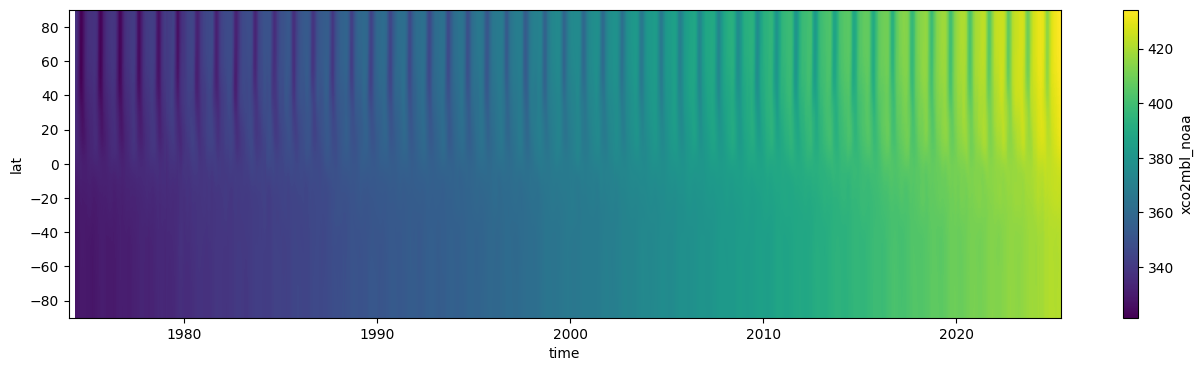

In [121]:
ds_atmospheric_co2.xco2mbl_noaa.T.plot.imshow(aspect=4, size=4)